# ВВедение
<br>В работе представлен анализ продаж мусульманских подвесов из драгоценных металлов в федеральной ювелирной сети розничных магазинов. Магазины расположены на всей территории РФ. Набор данных состоит из продаж и остатков помесячно в течение года для каждого магазина. У каждого магазина есть два атрибута: ID и адрес. Всего 900 магазинов. Отдельно представленны изделия из золота и серебра. Серебро представленно почти во всех магазинах. Золото, в связи с высокой себестоимостью, есть не во всех магазинах.
<br><b>Цель</b> анализа - найти критерии, которые позволят прогнозировать хорошие/плохие продажи по мусульманским подвесам из золота. В результате можно будет реструктуризировать товарный запас мусульманских подвесов из золота в текущих магазинах, а так же определять необходимо ли включать в ассортимент эти изделия для вновь открываемых объектов.
<br>Анализ состоит из 2 частей. В первой части будут рассмотрены текущие данные по продажам, рассчитана корреляция золото-серебро, сделаны выводы. Во второй части к текущим данным добавится дополнительная информация о магазинах и регионах, где они располагаются. Таким образом соберется большой датасет, в результате анализа, которого также будут сделаны выводы и разработан дашборд.</br>

### 1.1 Анализ продаж

In [2]:
import pandas as pd
import numpy as np
np.random.seed(2700)

In [204]:
# Данные с продажами и остатками 2019 год по золоту и серебру помесячно
path = 'C:/нетология/muslim.xlsx'

sales = pd.read_excel(path, sheet_name='олап', skiprows=13,usecols=list(range(0,26)))
stock = pd.read_excel(path, sheet_name='олап', skiprows=13,usecols=list(range(27,53)), names = sales.columns.tolist())
sales = sales.iloc[:sales.Склад.to_list().index('Общий итог')]#обрезаем пустые строчки
stock = stock.iloc[:stock.Склад.to_list().index('Общий итог')]

# меняем все отрицательные(ошибочные) продажи на ноль
num = sales._get_numeric_data()
num[num < 0] = 0 

gold = [x for x in sales.columns.tolist() if '.1' not in x or x in ['Склад','Название']]
silver = [x for x in sales.columns.tolist() if '.1' in x or x in ['Склад','Название']]

# отделяем остатки, продажи, золото, серебро
sales_gold = sales[gold]
sales_silver = sales[silver]
stock_gold = stock[gold]
stock_silver = stock[silver]

stock_gold.columns = sales_gold.columns
stock_silver.columns = sales_gold.columns
sales_silver.columns = sales_gold.columns



In [205]:
# Полезные функции и переменные
quarter_dict = {'квартал1': ['Январь,2019', 'Февраль,2019', 'Март,2019'],
                'квартал2': ['Апрель,2019', 'Май,2019', 'Июнь,2019'],
                'квартал3': ['Июль,2019', 'Август,2019', 'Сентябрь,2019'],
                'квартал4': ['Октябрь,2019', 'Ноябрь,2019', 'Декабрь,2019']}

quarter = ['квартал1', 'квартал2', 'квартал3', 'квартал4']

months = ['Январь,2019', 'Февраль,2019', 'Март,2019', 'Апрель,2019', 'Май,2019', 'Июнь,2019',
          'Июль,2019', 'Август,2019', 'Сентябрь,2019', 'Октябрь,2019', 'Ноябрь,2019', 'Декабрь,2019']


def quarter(df):
    """Преобразует датафрейм с месячными данными в датафрейм с квартальными данными суммированием"""
    q_list = [x if x in ['Склад','Название'] else df[x].sum(axis=1) for x in list(quarter_dict.values())]
    return pd.DataFrame(dict(zip(quarter, q_list)))

def quarter(df):
    """Преобразует датафрейм с месячными данными в датафрейм с квартальными данными счетом"""
    q_list = [x if x in ['Склад','Название'] else df[x].count(axis=1) for x in list(quarter_dict.values())]
    return pd.DataFrame(dict(zip(quarter, q_list)))
   

In [153]:
# считаем количество магов с остатками больше нуля

pd.DataFrame(index=np.array(months), data=
             {"Количество магов с остатками больше нуля серебро" : np.count_nonzero(stock_silver[months],axis=0),
              "Количество магов с остатками больше нуля золото" : np.count_nonzero(stock_gold[months],axis=0)})


,Количество магов с остатками больше нуля серебро,Количество магов с остатками больше нуля золото
"Январь,2019",910,632
"Февраль,2019",909,626
"Март,2019",917,625
"Апрель,2019",924,629
"Май,2019",921,627
"Июнь,2019",939,633
"Июль,2019",949,771
"Август,2019",955,782
"Сентябрь,2019",967,782
"Октябрь,2019",976,793


In [79]:
permanent = len([x for x in np.count_nonzero(stock_silver[months],axis=1) if x == 12])
lost = sum([x-868 for x  in np.count_nonzero(stock_silver[months],axis=0)])
'Магазинов с остатками больше нуля целый год: {}. Если взять только эти магазины то потеряется {:.0%} данных'.format(permanent, lost/(permanent*12))

'Магазинов с остатками больше нуля целый год: 868. Если взять только эти магазины то потеряется 9% данных'

In [80]:
# По магазинам с остатками по золоту считаем корреляцию продаж золота и серебра помесячно,

stock_gold['остаток месяцев'] = stock_gold[months].astype(bool).sum(axis=1)
sws_m = stock_gold[['Склад']][stock_gold['остаток месяцев'] > 0].merge(sales)
m_corr = pd.Series(index=np.array(months), data=np.diagonal(sws_m.corr().round(decimals=2).iloc[12: , :12].values))

#поквартально,
mlist = list(range(3,25,3))
qdata = [sws_m.iloc[:,x-3:x].sum(axis=1).tolist() for x in mlist]
names = ['квартал1','квартал2','квартал3','квартал4','квартал1s','квартал2s','квартал3s','квартал4s']
sws_q = pd.DataFrame(dict(zip(names,qdata)))
q_corr = pd.Series(index=sws_q.columns.tolist()[:4],data=np.diagonal(sws_q.corr().round(decimals=2).iloc[:4,4:].values))

# годовая
sws_y = pd.DataFrame({'золото' : sws_q.iloc[:,:4].sum(axis=1).tolist(),'серебро' : sws_q.iloc[:,4:].sum(axis=1).tolist()})

print('Маги с остатками по золоту и серебру больше нуля весь год',
      'Корреляция продаж золото-серебро помесячно.',m_corr, 
      'Корреляция продаж золото-серебро поквартально.',q_corr,
      'Корреляция продаж золото-серебро годовая.', sws_y.corr().round(decimals=2).at["золото",'серебро'], sep="\n\n")

Маги с остатками по золоту и серебру больше нуля весь год

Корреляция продаж золото-серебро помесячно.

Январь,2019      0.51
Февраль,2019     0.55
Март,2019        0.54
Апрель,2019      0.43
Май,2019         0.55
Июнь,2019        0.59
Июль,2019        0.57
Август,2019      0.61
Сентябрь,2019    0.53
Октябрь,2019     0.49
Ноябрь,2019      0.47
Декабрь,2019     0.60
dtype: float64

Корреляция продаж золото-серебро поквартально.

квартал1    0.67
квартал2    0.67
квартал3    0.74
квартал4    0.71
dtype: float64

Корреляция продаж золото-серебро годовая.

0.82


C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
# Боксплотты и статистики по продажам с разной временной иерархией (месяцы, квартал, год)
sws_m_gold = sws_m[[x for x in sws_m.columns.tolist()[2:] if '.1' not in x]]
sws_m_silver = sws_m[[x for x in sws_m.columns.tolist() if '.1' in x]]

sws_q_gold = sws_q[[x for x in sws_q.columns.tolist() if 's' not in x]]
sws_q_silver = sws_q[[x for x in sws_q.columns.tolist() if 's' in x]]

sws_m_silver.columns = sws_m_gold.columns
sws_q_silver.columns = sws_q_gold.columns


In [83]:
gold_m_stat = sws_m_gold.describe().round(decimals=1).T.drop(columns='count')
silver_m_stat = sws_m_silver.describe().round(decimals=1).T.drop(columns='count')
gold_m_stat.columns = pd.MultiIndex.from_product([['Статистика продажи золото'], gold_m_stat.columns.tolist()])
silver_m_stat.columns = pd.MultiIndex.from_product([['Статистика продажи серебро'],silver_m_stat.columns.tolist()])
gold_m_stat.merge(silver_m_stat, left_index=True, right_index=True)


Статистика продажи золото                                 \
                                   mean  std  min  25%  50%  75%   max   
Январь,2019                         1.0  1.8  0.0  0.0  0.0  1.0  13.0   
Февраль,2019                        1.0  1.7  0.0  0.0  0.0  1.0  11.0   
Март,2019                           1.4  2.2  0.0  0.0  0.0  2.0  15.0   
Апрель,2019                         0.8  1.4  0.0  0.0  0.0  1.0   9.0   
Май,2019                            1.0  1.7  0.0  0.0  0.0  1.0  12.0   
Июнь,2019                           1.2  1.9  0.0  0.0  0.0  2.0  12.0   
Июль,2019                           1.4  2.1  0.0  0.0  0.0  2.0  13.0   
Август,2019                         1.5  2.0  0.0  0.0  1.0  2.0  12.0   
Сентябрь,2019                       1.3  1.7  0.0  0.0  1.0  2.0  12.0   
Октябрь,2019                        1.1  1.5  0.0  0.0  0.0  2.0  12.0   
Ноябрь,2019                         1.1  1.5  0.0  0.0  1.0  2.0  11.0   
Декабрь,2019                        2.1  2.5  0.0  0.0  1.0  3.0  19.0   

              Статистика продажи серебро                                 
                                    mean  std  min  25%  50%  75%   max  
Январь,2019                          1.4  2.0  0.0  0.0  1.0  2.0  19.0  
Февраль,2019                         1.6  2.2  0.0  0.0  1.0  2.0  20.0  
Март,2019                            1.6  2.1  0.0  0.0  1.0  2.0  16.0  
Апрель,2019                          1.2  1.6  0.0  0.0  1.0  2.0  11.0  
Май,2019                             1.5  2.2  0.0  0.0  1.0  2.0  19.0  
Июнь,2019                            1.9  2.6  0.0  0.0  1.0  2.0  19.0  
Июль,2019                            2.1  3.0  0.0  0.0  1.0  3.0  21.0  
Август,2019                          2.4  3.2  0.0  0.0  1.0  3.0  24.0  
Сентябрь,2019                        2.2  2.8  0.0  0.0  1.0  3.0  20.0  
Октябрь,2019                         1.9  2.5  0.0  0.0  1.0  3.0  17.0  
Ноябрь,2019                          1.8  2.4  0.0  0.0  1.0  2.0  21.0  
Декабрь,2019                         3.3  4.2  0.0  1.0  2.0  4.0  35.0

In [119]:
gold_q_stat = sws_q_gold.describe().round(decimals=1).T.drop(columns='count')# поквартальная статистика золото
silver_q_stat = sws_q_silver.describe().round(decimals=1).T.drop(columns='count')# поквартальная статистика серебро
sws_y_stat = sws_y.describe().astype('int').T.drop(columns='count')# годовая статистика

new_line1 = sws_y_stat.loc['золото'].tolist()
new_line2 = sws_y_stat.loc['серебро'].tolist()

gold_q_stat.loc['2019  год'] = new_line1
silver_q_stat.loc['2019  год'] = new_line2

gold_q_stat.columns = pd.MultiIndex.from_product([['Статистика продажи золото'], gold_q_stat.columns.tolist()])
silver_q_stat.columns = pd.MultiIndex.from_product([['Статистика продажи серебро'],silver_q_stat.columns.tolist()])
gold_q_stat.merge(silver_q_stat, left_index=True, right_index=True)


Статистика продажи золото                                   \
                               mean   std  min  25%  50%   75%   max   
квартал1                        1.0   1.8  0.0  0.0  0.0   1.0  13.0   
квартал2                        3.2   4.6  0.0  0.0  1.0   4.2  29.0   
квартал3                        3.5   4.9  0.0  0.0  2.0   5.0  30.0   
квартал4                        3.8   4.3  0.0  1.0  2.0   5.0  28.0   
2019  год                      11.0  14.0  0.0  2.0  6.0  16.0  83.0   

          Статистика продажи серебро                                     
                                mean   std  min  25%   50%   75%    max  
квартал1                         4.6   4.9  0.0  1.0   3.0   6.0   46.0  
квартал2                         4.4   5.1  0.0  1.0   3.0   6.0   42.0  
квартал3                         5.5   6.9  0.0  2.0   4.0   7.0   56.0  
квартал4                         6.5   7.7  0.0  2.0   4.0   8.0   60.0  
2019  год                       20.0  22.0  0.0  8.0  15.0  25.0  176.0

Text(0.5,1,'Продажи золото по месяцам')

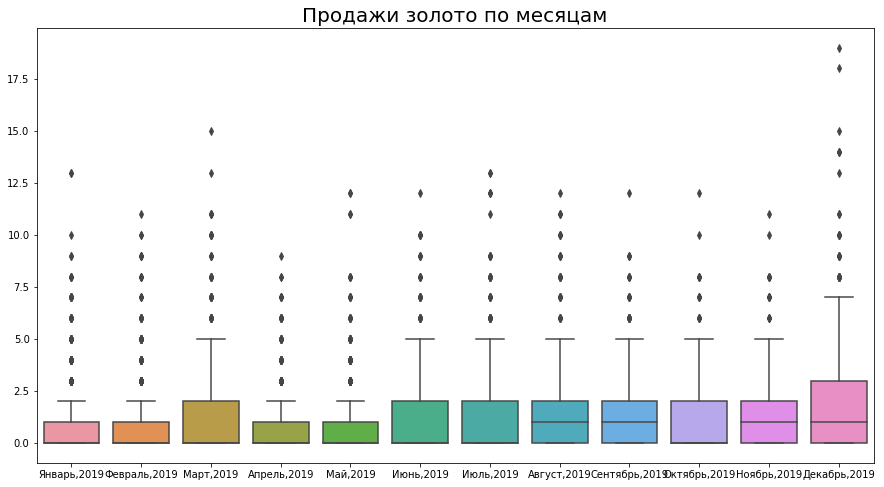

In [91]:
# Боксплотты по продажам с разной временной иерархией (месяцы, квартал, год)
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.boxplot(data=sws_m_gold).set_title("Продажи золото по месяцам", fontsize=20)

Text(0.5,1,'Продажи серебро по месяцам')

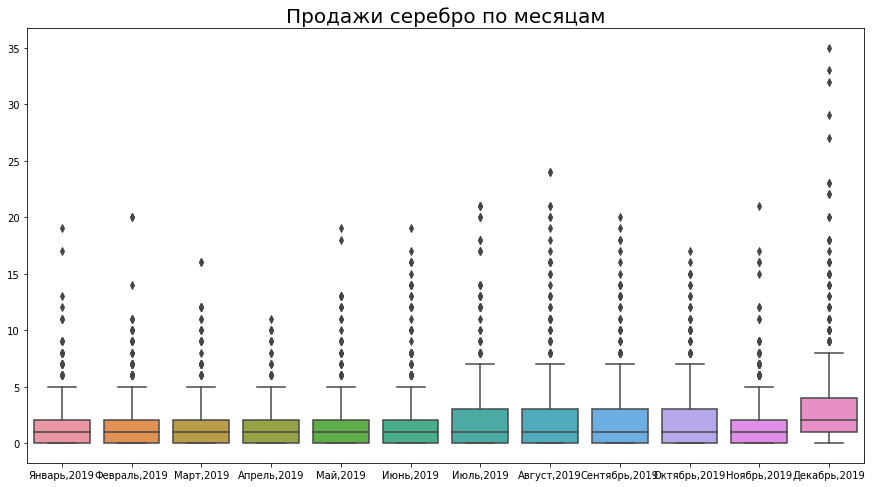

In [87]:
plt.figure(figsize=(15,8))
sns.boxplot(data=sws_m_silver).set_title("Продажи серебро по месяцам", fontsize=20)

Text(0.5,1,'Продажи золото по кварталам')

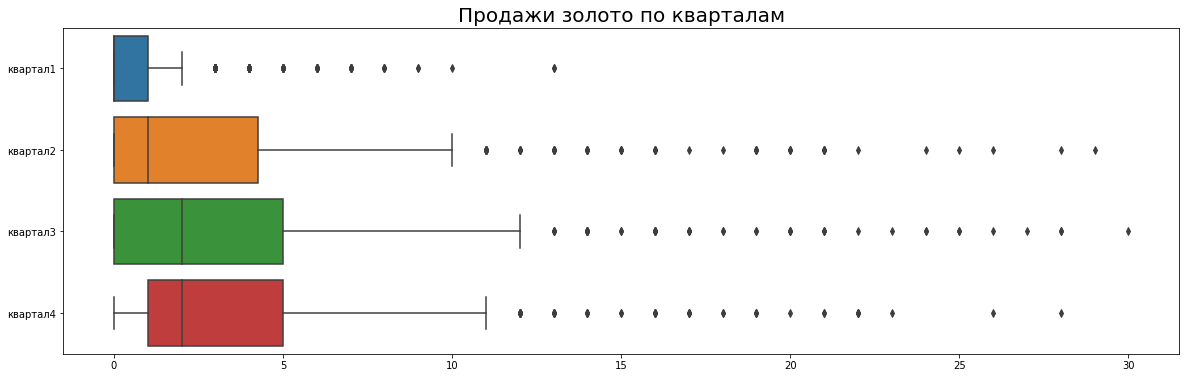

In [88]:
plt.figure(figsize=(20,6))
sns.boxplot(data=sws_q_gold, orient="h").set_title("Продажи золото по кварталам", fontsize=20)

Text(0.5,1,'Продажи серебро по кварталам')

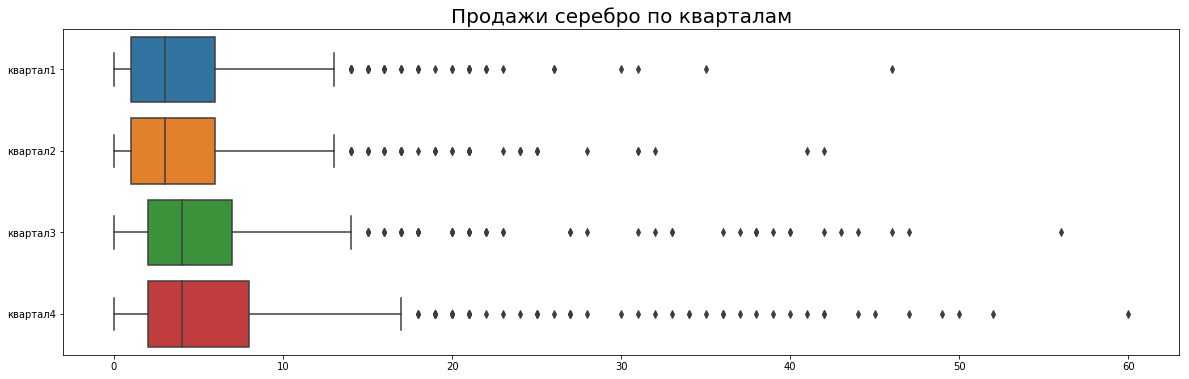

In [89]:
plt.figure(figsize=(20,6))
sns.boxplot(data=sws_q_silver, orient="h").set_title("Продажи серебро по кварталам", fontsize=20)

Text(0.5,1,'Продажи за год')

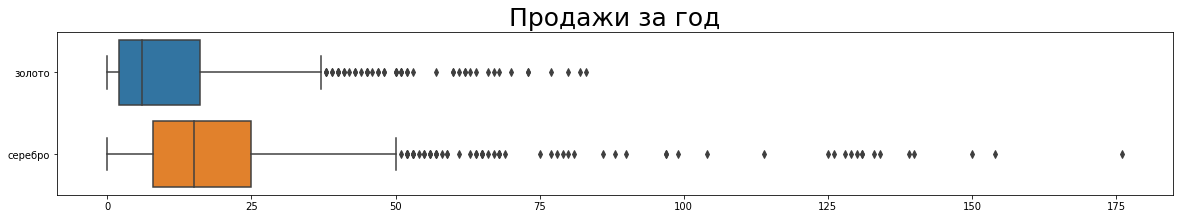

In [90]:
plt.figure(figsize=(20,3))
sns.boxplot(data=sws_y, orient="h").set_title("Продажи за год", fontsize=25)

### 1.2 Выводы

+ Между продажами золота и серебра существует большая корреляция. 
+ Данные по серебру имеют меньший разброс, чем по золоту. В связи с этим дальше анализировать будем данные по серебрянным мусульманским подвесам, выводы можно будет использовать для реструктурирования текущего товарного запаса по золотым мусульманским подвесам. 
+ Для дальнейшего анализа будем использовать среднеквартальные показатели. В рассчет будут приниматься, те кварталы по которым остаток по мусульманским подвесам был больше нуля в течение всего квартала.

### 2.1 Сбор и анализ большого набора данных
Для последующего анализа из текущего набора данных рассчитаем среднеквартальные продажи и остатки по серебрянным мусульманским подвесам и оборачиваемость. Добавим дополнительные столбцы и переименуем текущие столбцы для удобства. В итоге получим следующие атрибуты:
+ id - номер магазина
+ adress - адрес
+ sales - продажи мусульманских подвесов за 2019 год
+ months - месяцев с остатками больше нуля в 2019 году
+ av_monthly_bal - средний месячный остаток
+ city - город или населенный пункт, по этому параметру каждому объекту можно установить признак региона
+ shop_size - вместимость объекта в штуках
+ turn_rate - средняя оборачиваемость в месяц
+ population - количество жителей в населенном пункте 
+ salary - средняя зарплата (distr - в округе,reg - в регионе)
+ muslim_per - процент верующих мусульман (distr - в округе,reg - в регионе)
+ rus_per - процент русских по национальности (distr - в округе,reg - в регионе)
+ religion_imp - процент людей, для которых религия играет важную роль в жизни (distr - в округе,reg - в регионе)
+ coordinates - координаты населенных пунктов


###### Откуда брал данные:

+ Численность населения - Оценка численности постоянного населения на 1 января 2018г.Росстат по городам
+ Доля мусульман, процент русских, процент религиозных - Общероссийский опрос МегаФОМ 29 мая – 25 июня 2012 г. по субъектам РФ
+ Доходы населения - Среднемесячная номинальная начисленная заработная плата работников по полному кругу организаций  по субъектам Российской Федерации. Росстат. 2018-2019 г
+ Все геоданные получал через API YandexMaps, Nominatim, Overpass Turbo


##### Дополнительные данные: 
+ при помощи обертки на Python для API базы данных OSM карт собрал датасет по мечетям в России (датасет состоит из координат и полного адреса) 
+ при помощи Nominаtim собрал полигоны для отрисовки регионов в Matplotlib


Все данные собрал в единую таблицу в EXcel потом загрузил в ноутбук.
Чеченская  и Ингушская республика не участвовала в исследовании МегаФОМ. Поэтому для этих республик данные загрузил отдельно

In [202]:
pd.read_excel(path, sheet_name='олап', skiprows=10, usecols=[55, 57], nrows=1012, dtype='int', names=['id', 'tot_sales'])

,id,tot_sales
0,10,1075
1,101,4807
2,1066,2317
3,1067,6267
4,107,3962
...,...,...
1007,92,1750
1008,925,2339
1009,955,5566
1010,96,3324


In [236]:
# Рассчитываем продажи, остатки и оборачиваемость
stock_silver['кол-во месяцев'] = np.count_nonzero(stock_silver.loc[:,months], axis=1)
stock_silver['срмес. остаток'] = (stock_silver.loc[:,months].sum(axis=1)/stock_silver['кол-во месяцев']).round(decimals=2)
sales_silver['сумма_продаж'] = sales_silver.loc[:,months].sum(axis=1)

mus_df = pd.merge(stock_silver[['Склад', 'Название', 'кол-во месяцев', 'срмес. остаток']], sales_silver[['Склад','сумма_продаж']],how='left')
mus_df = mus_df[mus_df['кол-во месяцев'] > 2]#убираем магазины с остатком меньше 2 месяцев
mus_df['ср.оборачиваемость'] = (mus_df['срмес. остаток']/(mus_df['сумма_продаж']/mus_df['кол-во месяцев'])).round(decimals=1)
mus_df.columns = ['id', 'address', 'months', 'av_monthly_bal', 'sales', 'turn_rate']
mus_df['id'] = mus_df.id.astype('int')
# Добавляем продажи всех серебрянных изделий за год и удаляем строки с продажами меньше 150 штук, чтобы избавиться от выбросов
tot_sales = pd.read_excel(path, sheet_name='олап', skiprows=10, usecols=[55, 57], nrows=1012, dtype='int', names=['id', 'tot_sales'])
true_ids = tot_sales.id[tot_sales['tot_sales'] > 150].to_list()
mus_df = mus_df[mus_df.id.isin(true_ids)]


C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is 

In [61]:
# По адресу добавляем координаты объекта, название населенного пункта, региона и округа
from geopy.geocoders import OpenMapQuest, Yandex, Nominatim
geolocator_OMQ = OpenMapQuest(api_key='zOA5lkVSdOAucWuB4DILCoRZyldjPRic', timeout=10000)
geolocator_Y = Yandex(api_key='6e812556-1ed1-445c-9efc-727060bf204a', timeout=10000)
geolocator_N = Nominatim(user_agent="x-fly@list.ru")
# mus_df['coordinates'] = mus_df.address.apply(
#     lambda x: geolocator_иY.geocode(x, timeout=10000, country_codes='ru') if geolocator_Y.geocode(x, timeout=10000, country_codes='ru') != None else 'not found')
# mus_df['full_address'] = mus_df['coordinates'].apply(
#      lambda x: x if x == 'not found' else geolocator_OMQ.reverse(x).address)


In [24]:
mus_df['country'] = mus_df.full_address.apply(lambda x: x if x == 'not found' else x.split(',')[-1])
mus_df = mus_df[mus_df['country'] != 'Казахстан'] #убираем Казахстан                                                                  

In [25]:
# Проверяем какие адреса не получилось геокодировать
mus_df[mus_df.country.str.contains('[A-z]',regex=True)]

,id,address,months,av_monthly_bal,sales,turn_rate,coordinates,full_address,country
246,3409,"Кольцово раб. поселок , 19",12,9.92,6.0,19.8,"(54.940774, 83.187966)",not found,not found
356,3644,"Норильск, Строителей, 12",12,21.00,38.0,6.6,"(69.484083, 88.398392)",not found,not found
412,3778,Ростов-на-Дону 14-я Линия 84,12,8.42,4.0,25.3,"(47.240869, 39.750721)",not found,not found
567,4369,"Находка, Cпортивная, 2",12,31.17,24.0,15.6,"(42.77844, 132.853779)",not found,not found
580,4389,"Санкт-Петербург, Мега-Парнас",12,23.25,74.0,3.8,"(59.939095, 30.315868)",not found,not found
621,4436,Кстово ул 40 лет Октября 14,12,49.17,17.0,34.7,"(56.147897, 44.198954)",not found,not found
628,4443,Ярославль Ленинградский пр 123,12,16.08,12.0,16.1,"(57.697731, 39.757925)","A897, Kildonan, Highland, Scotland, KW8 6HY, UK",UK
629,4444,Иваново ул 8 Марта 32,12,8.67,12.0,8.7,"(57.005529, 40.985302)",not found,not found
728,4547,Новый Уренгой ул Сибирская 26,12,8.50,51.0,2.0,"(66.082833, 76.631279)",not found,not found
770,4602,Выборг Железнодорожный тупик 4,12,15.50,29.0,6.4,"(60.707309, 28.773631)",not found,not found


In [26]:
# строчку 1216 удаляем, остальные неизвестные корректируем адрес и прогоняем еще раз через геокодер
mus_df = mus_df[mus_df['address'] != 'Отдел продаж (онлайн и офлайн)']

corrections = dict(zip(
[3409,3644,3778,4369,4389,4436,4443,4444,4547,4602,4679,707, 4725],
['Кольцово раб. поселок , 19',
 'Норильск, Строителей, 12',
 'Ростов-на-Дону 14-я Линия 84',
 'Находка, Cпортивная, 2',
 'Санкт-Петербург, Мега-Парнас',
 'Кстово ул 40 лет Октября 14',
 'Ярославль Ленинградский пр 123',
 'Иваново ул 8 Марта 32',
 'Новый Уренгой ул Сибирская 26',
 'Выборг Железнодорожный тупик 4',
 'Самара, 24км Московского шоссе № 5',
 'Ростов-на-Дону, Малиновского, 23',
 'Адыгея, Яблоновский, Промышленная, 4/3']
))

for x in list(corrections.keys()):
    mus_df.loc[mus_df['id'] == x, 'address'] = corrections[x]#меняем адрес на правильный

for x in list(corrections.keys()):
    mus_df.loc[mus_df['id'] == x, 'coordinates'] = x #меняем адрес на правильный    
    
mus_df['coordinates'] = mus_df.coordinates.apply(lambda x: geolocator_Y.geocode(corrections[x]).point[:2] if x in list(corrections.keys()) else x)#меняем координаты на правильные

In [27]:
for x in list(corrections.keys()):
    mus_df.loc[mus_df['id'] == x, 'full_address'] = geolocator_OMQ.reverse(geolocator_Y.geocode(corrections[x]).point[:2]).address#меняем полный адрес на правильный

In [209]:
# Добавляем в текущий датасет данные по размеру магазина, доходам, населению, важность религии, процент мусульман, принадлежности к городу/региону/округу.
ref_book = pd.read_excel(r'C:\нетология\muslim.xlsx', sheet_name='типы', usecols=list(range(6,20)))
ref_book['id'] = ref_book['id'].astype('float64')
mus_df = pd.merge(mus_df,ref_book,how='left', on='id')
mus_df.head(5).T

,0,1,2,3,4
id,10,101,1066,1067,107
address,"Астрахань,Чалбаяна/Ногина, 26/9","Белгород, Богдана Хмельницкого, 103","Ставрополь, Карла Маркса, 62","Выборг, Северная, 10","Энгельс, Свободы, 3а"
months,12,12,12,12,12
av_monthly_bal,4.67,27,13.75,30.17,13.33
sales,19,16,13,27,34
turn_rate,2.9,20.2,12.7,13.4,4.7
coordinates,"(46.346874, 48.053418)","(50.601195, 36.580216)","(45.048405, 41.982217)","(60.711394, 28.750715)","(51.500983, 46.127771)"
full_address,"Лицей № 3, 17, улица Чалабяна, Астрахань, горо...","103, проспект Б.Хмельницкого, Левобережье, Бел...","Октябрь, проспект Карла Маркса, Октябрьский ра...","10, Северная улица, Папула, Центральный микрор...","Магнит, Телеграфная улица, Энгельс, Энгельсски..."
country,РФ,РФ,РФ,РФ,РФ
city,Астрахань,Белгород,Ставрополь,Выборг,Энгельс


#### Посмотрим что из себя представляет большой набор данных


In [110]:
# проверяем наличие пустых значений
mus_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977 entries, 0 to 976
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  977 non-null    int64  
 1   address             977 non-null    object 
 2   months              977 non-null    int64  
 3   av_monthly_bal      977 non-null    float64
 4   sales               967 non-null    float64
 5   turn_rate           963 non-null    float64
 6   coordinates         977 non-null    object 
 7   full_address        977 non-null    object 
 8   country             977 non-null    object 
 9   city                977 non-null    object 
 10  shop_size           977 non-null    float64
 11  population          977 non-null    float64
 12  salary_reg          977 non-null    float64
 13  salary_district     977 non-null    float64
 14  muslim_per_reg      977 non-null    float64
 15  muslim_per_distr    977 non-null    float64
 16  religion

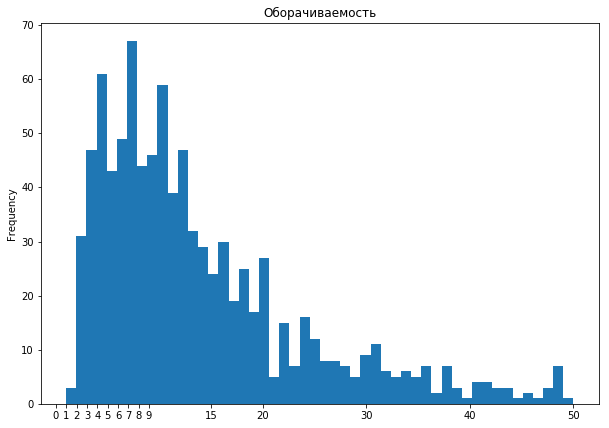

In [123]:
# посмотрим распределение по оборачиваемости, среднемес продажам, размеру магазинов и размеру городов
pd.set_option('use_inf_as_na', True)# убирает inf при делении на ноль
ticks = list(range(10)) + [15] +  list(range(20, 51, 10))
mus_df['turn_rate'][(mus_df['turn_rate'] > 0) & (mus_df['turn_rate'] < 50)].round(0).plot(kind='hist', bins=50, title='Оборачиваемость', figsize=(10, 7), xticks=ticks)


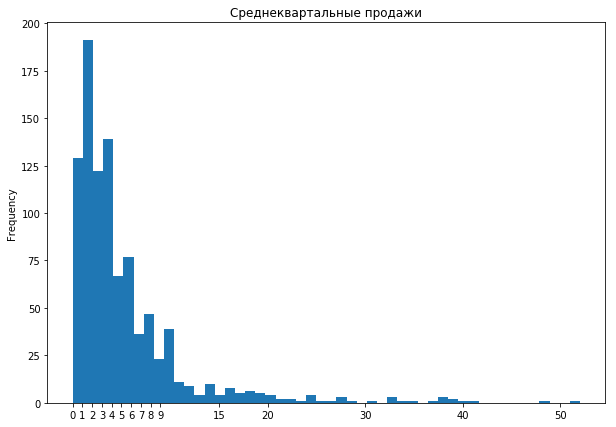

In [165]:
av_quarter_sales = (mus_df.sales / mus_df.months * 3)
av_quarter_sales.round(0).plot(kind='hist', bins=50, title='Среднеквартальные продажи', figsize=(10, 7), xticks=ticks)



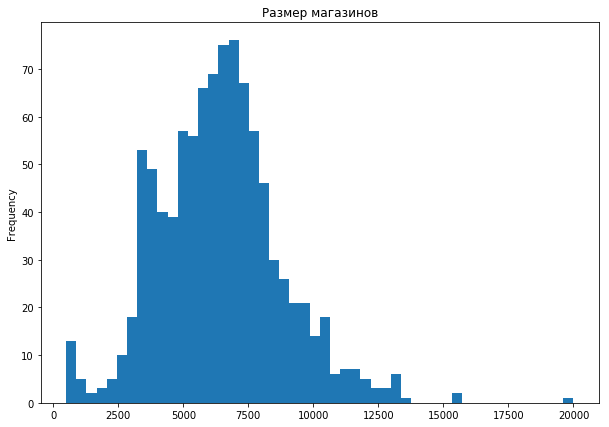

In [168]:
((mus_df.shop_size / 100).round(0) * 100).plot(kind='hist', bins=50, title='Размер магазинов', figsize=(10, 7))

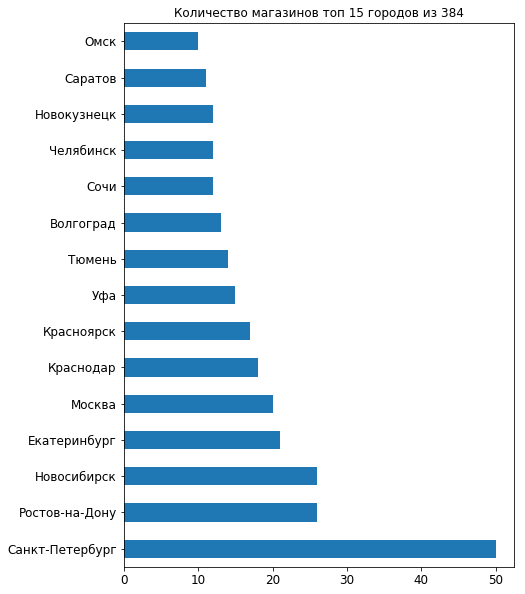

In [170]:
#количество городов, регионов и округов
city_n = mus_df.city.value_counts().count()
mus_df.city.value_counts()[:15].plot(kind='barh', figsize=(7, 10), title='Количество магазинов топ 15 городов из ' + str(city_n), fontsize=12)


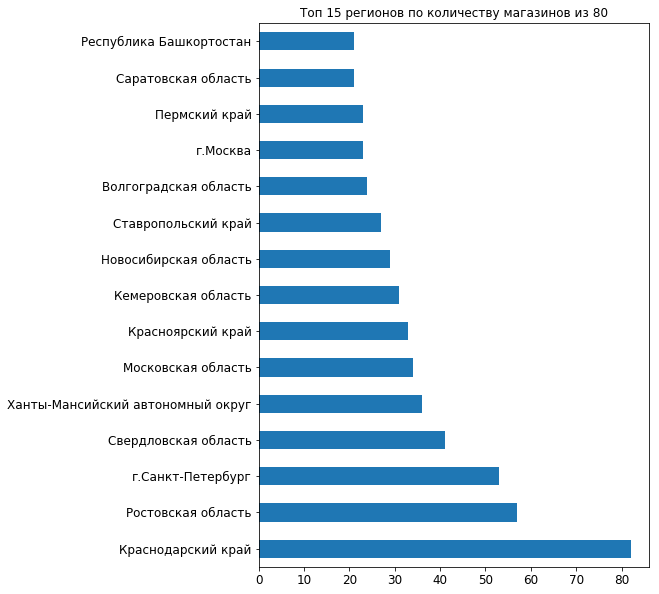

In [312]:
reg_name = mus_df.region.value_counts().count()
mus_df.region.value_counts()[:15].plot(kind='barh', figsize=(7, 10), title='Топ 15 регионов по количеству магазинов из ' + str(reg_name), fontsize=12)

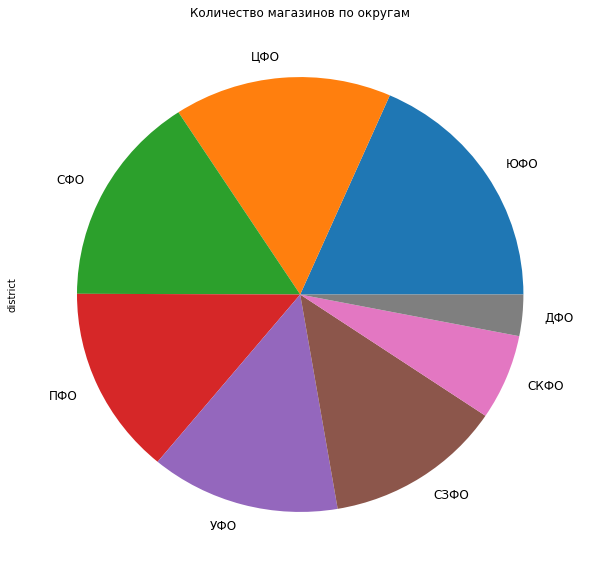

In [151]:
mus_df.district.value_counts().plot(kind='pie', figsize=(10, 10), title='Количество магазинов по округам', fontsize=12)

In [3]:
mus_df = pd.read_pickle(r'C:\нетология\muslim.pkl')

##### Посмотрим влияют ли на продажи мусульманских подвесов размер магазина и размер города в котором расположен магазин. Для этого, использую координаты объектов создадим две диаграммы разброса данных:
 
+ 100 магазинов с самыми большими среднеквартальными продажами и 100 самых больших магазинов
+ 100 магазинов с самыми большими среднеквартальными продажами и 100 магазинов в городах с самым большим населением


In [42]:
# отобразим на графике 100 самых больших магазинов, 100 магазинов из самых больших городов, 100 магазинов с самыми большими среднемесячными продажами(при оборачиваемости меньше 20) 
largest_shops = mus_df[['coordinates', 'shop_size']].sort_values(by='shop_size', ascending=False).iloc[:101]
largest_cities = mus_df[['coordinates', 'population']].sort_values(by='population', ascending=False).iloc[:101]
largest_sales = mus_df[['coordinates', 'sales', 'months']]
largest_sales['av_quarter_sales'] = largest_sales.sales / largest_sales.months * 3
largest_sales = largest_sales[['coordinates', 'av_quarter_sales']].sort_values(by='av_quarter_sales', ascending=False).iloc[:101]


C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


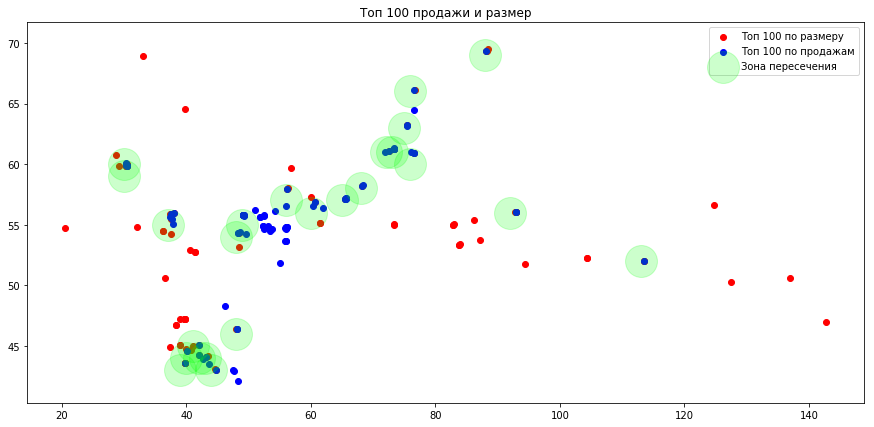

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sales = [(x, y) for (y, x) in largest_sales.coordinates.tolist()]
shops = [(x, y) for (y, x) in largest_shops.coordinates.tolist()]
sales_rounded = set([(int(x), int(y)) for (x, y) in sales])
shops_rounded = set([(int(x), int(y)) for (x, y) in shops])
intersection = list(sales_rounded.intersection(shops_rounded))
plt.scatter(*zip(*shops), c='red', label='Топ 100 по размеру')
plt.scatter(*zip(*sales), c='blue', label='Топ 100 по продажам')
plt.scatter(*zip(*intersection), s=1020, c='lime', alpha=0.2, label='Зона пересечения' )
plt.title('Топ 100 продажи и размер')
plt.legend()
plt.show()

In [308]:
print(len(intersection)/len(sales_rounded))
print(len(intersection)/len(shops_rounded))

0.5333333333333333
0.4067796610169492


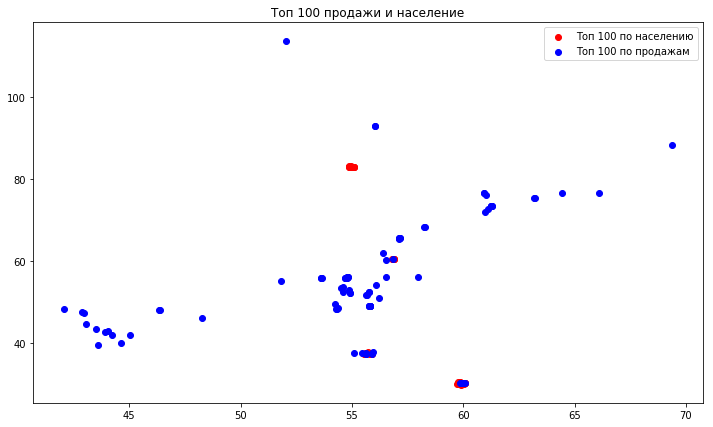

In [47]:
plt.figure(figsize=(12, 7))
population = [(x, y) for (y, x) in largest_cities.coordinates.tolist()]
plt.scatter(*zip(*largest_cities.coordinates), c='red', label='Топ 100 по населению')
plt.scatter(*zip(*largest_sales.coordinates), c='blue', label='Топ 100 по продажам')
plt.title('Топ 100 продажи и население')
plt.legend()
plt.show()

In [259]:
largest_cities.population.value_counts()

5351935.0     50
1612833.0     26
12506468.0    20
1468833.0      5
Name: population, dtype: int64

##### Выводы:
+ Больше всего магазинов в регионах: Краснодарский край и Ростовская область. Среди городов больше всего магазинов в Санкт-Петербурге - сравнимо с Ростовской областью
+ По округам магазины распределены равномерно. Кроме ДФО и CЗФО. В ДФО населения меньше чем в Москве (8 млн), СЗФО маленький по территории.
+ Между размером магазина и продажами мусульманских подвесов пересечение в 50% случаев 
+ В выборку 100 магазинов с самым большим населением попало всего 4 города. Чтобы найти закономерности между данными нужно агрегировать по городу. 

###### Мечети в России
При помощи обертки для Overpass-turbo на Python Overpy получаем координаты всех мечетей в России. через  Overpass-turbo это web API для датамайнинга в базе данных OpenStreetMap. Все объекты представлены в этой базе данных в виде точек (nodes) и линий (way). Линии можно превратить в точку, получив центральную точку. Используя этот датасет проверим влияние мечетей на продажи мусульманских подвесов.


In [4]:
# запрос по точкам
import overpy

api = overpy.Overpass()
req_node = api.query("""
[out:json][timeout:250];
area["ISO3166-1"="RU"][admin_level=2];
node[building=mosque](area);
out;
""")


In [5]:
#запрос по линии
req_way = api.query("""
[out:json][timeout:250];
area["ISO3166-1"="RU"][admin_level=2];
way["building"="mosque"](area);
(._;>;);
out center;
""")


In [67]:
coords  = []
coords += [(float(node.lat), float(node.lon)) 
           for node in req_node.nodes]
coords += [(float(way.center_lat), float(way.center_lon)) 
           for way in req_way.ways]


In [8]:
len(coords)

1456

In [128]:
# добавляем к координатам мечети название города, региона и области

full_address = [geolocator_N.reverse(x).address for x in coords]

mosque_df = pd.DataFrame({'full_address': full_address, 'coords':coords})

# поправляем Крым, убираем РФ и индекс
mosque_df = mosque_df[~mosque_df['full_address'].str.contains('Укр')]


mosque_df['full_address'] = mosque_df['full_address'].str.split(', ')

mosque_df['district'] = mosque_df['full_address'].apply(lambda x: x[-3] if x[-2].isdigit() == True else x[-2])# округ


mosque_df['region'] = mosque_df['full_address'].apply(lambda x: x[-4] if x[-2].isdigit() == True else x[-3])

keys = [
'Приволжский федеральный округ',
'Северо-Западный федеральный округ',
'Северо-Кавказский федеральный округ',
'Сибирский федеральный округ',
'Уральский федеральный округ',
'Центральный федеральный округ',
'Южный федеральный округ'
]

values = [
'ПФО',
'СЗФО',
'СКФО',
'СФО',
'УФО',
'ЦФО',
'ЮФО',
]

distr_dict = dict(zip(keys, values))
mosque_df = mosque_df[mosque_df['district'].isin(keys)]

keys = [
'Башкортостан',
'Дагестан',
'Кабардино-Балкария',
'Карачаево-Черкесия',
'Марий Эл',
'Мордовия',
'Москва',
'Санкт-Петербург',
'Северная Осетия — Алания',
'Татарстан',
'Ханты-Мансийский автономный округ — Югра',
'Чечня',
'Чувашия'
]

values = [
'Республика Башкортостан',
'Республика Дагестан',
'Кабардино-Балкарская Республика',
'Карачаево-Черкесская Республика',
'Республика Марий Эл',
'Республика Мордовия',
'г.Москва',
'г.Санкт-Петербург',
'Республика Северная Осетия-Алания',
'Республика Татарстан',
'Ханты-Мансийский автономный округ',
'Чеченская Республика',
'Чувашская Республика'
]

region_dict = dict(zip(keys, values))
mosque_df = mosque_df[mosque_df['region'].isin(keys)]

mosque_df['district'] = mosque_df['district'].apply(lambda x: distr_dict[x])#чтобы совпадало с другим датасетом
mosque_df['region'] = mosque_df['region'].apply(lambda x: region_dict[x])

In [156]:
mosque_df.to_pickle('C:/нетология/mosque.pkl')

In [257]:
# Мечети по округам
mosque_df.district.value_counts()

ПФО     921
СКФО    245
УФО      14
ЦФО       5
СЗФО      2
Name: district, dtype: int64

##### Короткий вывод из датасета по мечетям в России: мечетей в Дальневосточном Федеральном округе по данным OSM нет.

##### Рассмотрим аггрегированные данные по городам, областям и округам

In [185]:
#аггрегируем данные по городам, регионам и областям
city_cols = ['months',  'sales',  'av_monthly_bal', 'city', 'shop_size', 'population']

region_cols = ['months',  'sales',  'av_monthly_bal',  'shop_size', 'salary_reg',  'muslim_per_reg',
       'religion_imp_reg',  'rus_per_reg', 'region']

distr_cols = ['months',  'sales', 'av_monthly_bal',  'shop_size',
       'salary_district',  'muslim_per_distr', 'religion_imp_distr',
       'rus_per_distr']

             

In [213]:
# округа
districts = mus_df[distr_cols].groupby(mus_df['district'])
districts = districts.agg({k: np.sum if k in ['months','sales'] else np.mean for k in distr_cols if k !='district'})
districts.reset_index(inplace=True)
districts['av_quarter_sales'] = districts.sales / districts.months * 3
districts['amount'] = districts.district.apply(lambda x: mus_df.district.value_counts().to_dict()[x])
districts['turn_rate'] = districts.av_monthly_bal / (districts.sales / districts.months)

In [214]:
districts

,district,months,sales,av_monthly_bal,shop_size,salary_district,muslim_per_distr,religion_imp_distr,rus_per_distr,av_quarter_sales,amount,turn_rate
0,ДФО,342,371.0,15.803667,7256.050220,53365.32,0.720475,8.942368,85.586487,3.254386,30,14.568340
1,ПФО,1597,5719.0,22.306715,6227.475498,32783.10,12.317776,16.559501,68.107610,10.743269,137,6.229030
2,СЗФО,1439,2034.0,14.405000,6560.755763,50754.60,1.059460,13.374155,90.223258,4.240445,126,10.191148
3,СКФО,706,1561.0,28.049839,5793.820207,27505.38,40.394395,29.797887,38.837755,6.633144,62,12.686218
4,СФО,1762,2022.0,15.170195,6721.838300,39258.14,1.167420,11.349639,88.316771,3.442679,154,13.219527
5,УФО,1555,3763.0,13.106866,6388.898361,49474.36,5.593922,15.168946,82.213839,7.259807,134,5.416204
6,ЦФО,1670,2388.0,15.403506,6236.739066,58083.38,1.587594,15.818874,93.793375,4.289820,154,10.772134
7,ЮФО,2014,2809.0,15.943184,6424.253175,32501.94,2.937507,12.754090,87.367898,4.184211,179,11.430962


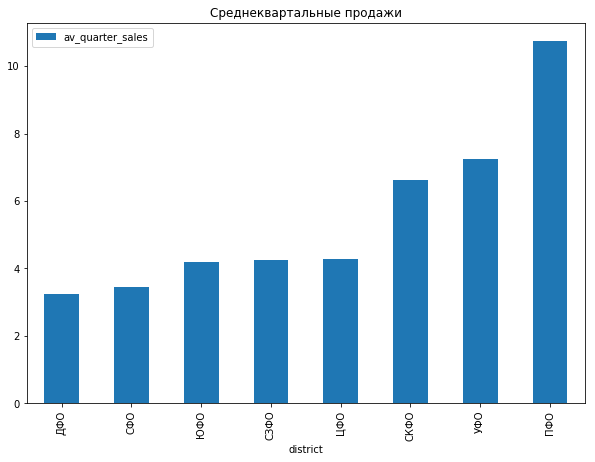

In [255]:
districts[['district', 'av_quarter_sales']].set_index('district').sort_values('av_quarter_sales').plot(kind='bar', figsize=(10,7), title='Среднеквартальные продажи')

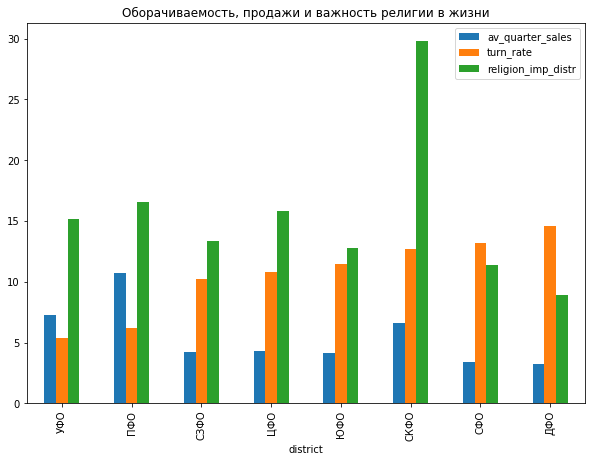

In [235]:
turn_sales = districts[['district', 'av_quarter_sales', 'turn_rate','religion_imp_distr']].set_index('district')
turn_sales.sort_values(by='turn_rate').plot(kind='bar', figsize=(10,7), title='Оборачиваемость, продажи и важность религии в жизни')

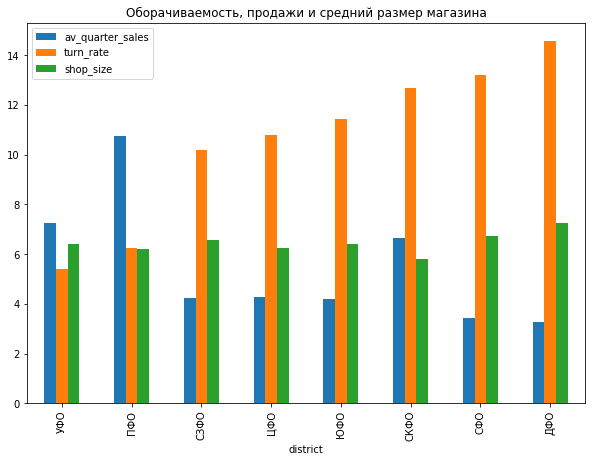

In [238]:
sizes = districts[['district', 'av_quarter_sales', 'turn_rate','shop_size']].set_index('district')
sizes['shop_size'] = sizes.shop_size / 1000

sizes.sort_values(by='turn_rate').plot(kind='bar', figsize=(10,7), title='Оборачиваемость, продажи и средний размер магазина')

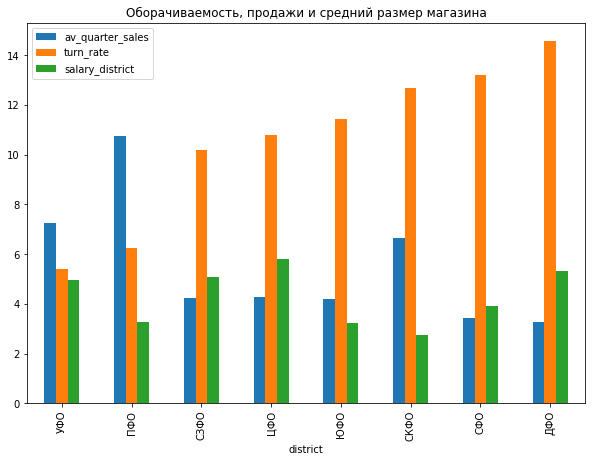

In [243]:

income = districts[['district', 'av_quarter_sales', 'turn_rate','salary_district']].set_index('district')
income['salary_district'] = income.salary_district / 10000

income.sort_values(by='turn_rate').plot(kind='bar', figsize=(10,7), title='Оборачиваемость, продажи и уровень дохода')

In [259]:
mus_df['av_quarter_sales'] = (mus_df.sales / mus_df.months * 3)

In [267]:
mus_df[['district', 'av_quarter_sales']].groupby('district').std()

,av_quarter_sales
district,
ДФО,2.303771
ПФО,11.423616
СЗФО,3.668317
СКФО,5.068178
СФО,2.604786
УФО,5.863637
ЦФО,3.684491
ЮФО,3.882810


#### Выводы в разрезе округов
+ Дальневосточный округ имеет самые плохие показатели по продажам/оборачиваемости, там нет мечетей, самый низкий процент мусульман и процент людей для которых религия имеет большое значение в жизни.
+ Средний размер магазина не оказывает влияния на продажи мусульманских подвесов. 
+ Доходы также не оказывают влияние, хотя возможно низкие доходы в СКФО не позволяют вырваться в лидеры. 
+ Количество мечетей и важность религии в жизни оказывают влияние на продажи мусульманских подвесов. Примечательно, в жизни мусульман религия имеет важное значение
+ В лидирующих трех округах по продажам и оборачиваемости  СЗФО и УФО обладают более низким стандартным отклонением, в ПФО стандартное отклонение самое высокое, скорее всего в лидеры выводят несколько регионов.


In [272]:
# регионы
regions = mus_df[region_cols].groupby(mus_df['region'])
regions = regions.agg({k: np.sum if k in ['months','sales'] else np.mean for k in region_cols if k !='region'})
regions.reset_index(inplace=True)
regions['av_quarter_sales'] = regions.sales / regions.months * 3
regions['amount'] = regions.region.apply(lambda x: mus_df.region.value_counts().to_dict()[x])
regions['turn_rate'] = regions.av_monthly_bal / (regions.sales / regions.months)
regions = regions.merge(mus_df[['region', 'district']].drop_duplicates(), on='region')

In [273]:
regions

,region,months,sales,av_monthly_bal,shop_size,salary_reg,muslim_per_reg,religion_imp_reg,rus_per_reg,av_quarter_sales,amount,turn_rate,district
0,Алтайский край,192,130.0,17.255000,6953.489631,25910.70,1.000,10.125,93.500,2.031250,16,25.484308,СФО
1,Амурская область,24,33.0,39.875000,9163.688562,44722.50,0.500,9.375,93.750,4.125000,2,29.000000,ДФО
2,Архангельская область,120,67.0,14.925000,6368.466878,50063.26,0.000,12.500,96.000,1.675000,10,26.731343,СЗФО
3,Астраханская область,112,447.0,13.501000,6998.188298,34343.30,14.250,22.250,73.875,11.973214,10,3.382801,ЮФО
4,Белгородская область,108,92.0,13.471111,5553.480449,32596.14,0.625,15.875,96.250,2.555556,9,15.813913,ЦФО
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Ямало-Ненецкий автономный округ,132,349.0,13.977273,7269.639016,103677.76,16.200,15.200,58.800,7.931818,11,5.286533,УФО
78,Ямало-Ненецкий автономный округ,132,349.0,13.977273,7269.639016,103677.76,16.200,15.200,58.800,7.931818,11,5.286533,СЗФО
79,Ярославская область,66,53.0,13.818333,6348.898786,34218.76,0.625,9.250,96.375,2.409091,6,17.207736,ЦФО
80,г.Москва,198,503.0,13.361739,5981.572872,90436.16,3.250,15.250,92.125,7.621212,23,5.259691,ЦФО


In [325]:
regions[regions['district'] =='ПФО']

,region,months,sales,av_monthly_bal,shop_size,salary_reg,muslim_per_reg,religion_imp_reg,rus_per_reg,av_quarter_sales,amount,turn_rate,district
21,Кировская область,24,60.0,56.125000,6935.399275,28531.98,0.875,11.375,92.125,7.500000,2,22.450000,ПФО
31,Нижегородская область,142,111.0,19.290833,6064.414947,34216.12,0.125,19.125,95.500,2.345070,12,24.678363,ПФО
35,Оренбургская область,48,148.0,31.605000,6725.173043,31508.82,13.750,13.875,70.250,9.250000,4,10.250270,ПФО
37,Пензенская область,84,130.0,12.930000,6624.340969,28856.66,5.125,19.625,86.125,4.642857,7,8.354769,ПФО
38,Пермский край,267,411.0,11.443043,6280.925360,36298.76,4.000,10.875,87.125,4.617978,23,7.433802,ПФО
43,Республика Башкортостан,238,2242.0,34.851429,5702.521496,34563.94,38.625,29.000,35.250,28.260504,21,3.699661,ПФО
50,Республика Марий Эл,24,28.0,28.955000,6337.951134,28577.98,6.000,21.400,47.200,3.500000,2,24.818571,ПФО
51,Республика Мордовия,55,67.0,15.192000,6930.082235,26969.04,2.500,9.625,64.750,3.654545,5,12.471045,ПФО
54,Республика Татарстан,205,1605.0,37.402778,6182.737536,35862.74,32.875,19.750,42.125,23.487805,18,4.777302,ПФО
59,Самарская область,84,148.0,14.510000,6074.511200,34721.96,2.125,9.250,83.750,5.285714,7,8.235405,ПФО


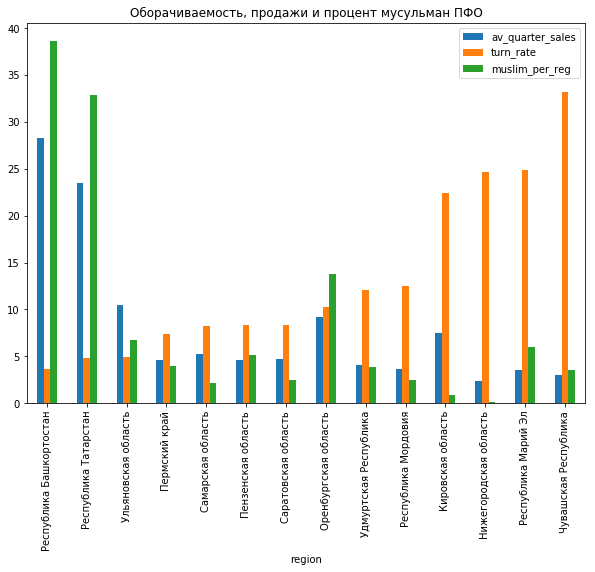

In [338]:
turn_sales = regions[['region', 'av_quarter_sales','turn_rate', 'muslim_per_reg']][regions['district'] =='ПФО'].set_index('region')
turn_sales.sort_values(by='turn_rate').plot(kind='bar', figsize=(10,7), title='Оборачиваемость, продажи и процент мусульман ПФО')

In [331]:
regions[regions['district'] =='УФО']

,region,months,sales,av_monthly_bal,shop_size,salary_reg,muslim_per_reg,religion_imp_reg,rus_per_reg,av_quarter_sales,amount,turn_rate,district
25,Курганская область,93,108.0,15.582500,7136.814731,28985.54,2.625,9.250,90.125,3.483871,8,13.418264,УФО
62,Свердловская область,479,726.0,13.005854,6270.763176,39255.90,2.625,9.875,89.750,4.546973,41,8.580997,УФО
69,Тюменская область,220,706.0,13.696842,6626.938808,71318.68,5.250,17.000,81.750,9.627273,19,4.268138,УФО
73,Ханты-Мансийский автономный округ,416,1378.0,12.960000,6283.322485,72223.24,10.125,19.125,65.250,9.937500,36,3.912453,УФО
74,Челябинская область,227,505.0,11.727000,5847.253820,35892.78,6.500,20.750,82.250,6.674009,20,5.271345,УФО
77,Ямало-Ненецкий автономный округ,132,349.0,13.977273,7269.639016,103677.76,16.200,15.200,58.800,7.931818,11,5.286533,УФО


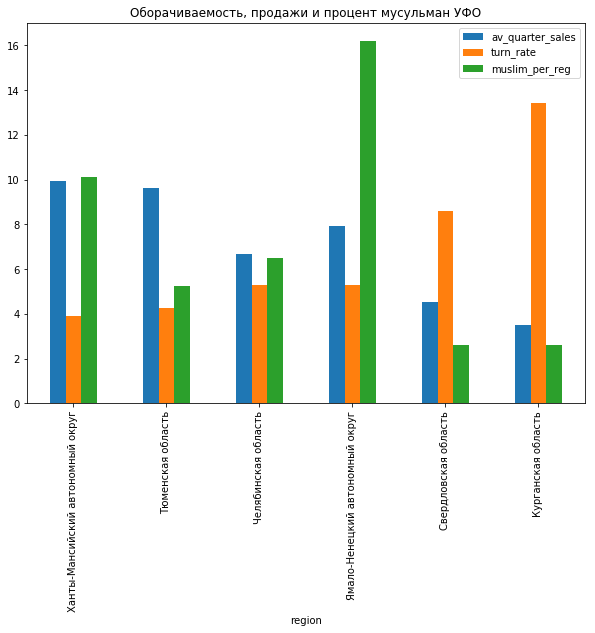

In [336]:
turn_sales = regions[['region', 'av_quarter_sales','turn_rate', 'muslim_per_reg']][regions['district'] =='УФО'].set_index('region')
turn_sales.sort_values(by='turn_rate').plot(kind='bar', figsize=(10,7), title='Оборачиваемость, продажи и процент мусульман УФО')

In [333]:
regions[regions['district'] =='СКФО']

,region,months,sales,av_monthly_bal,shop_size,salary_reg,muslim_per_reg,religion_imp_reg,rus_per_reg,av_quarter_sales,amount,turn_rate,district
15,Кабардино-Балкарская Республика,92,250.0,30.011250,4580.552710,26028.32,54.600,21.40,26.000,8.152174,8,11.044140,СКФО
19,Карачаево-Черкесская Республика,59,182.0,22.282000,6059.866716,25470.86,47.000,11.80,24.600,9.254237,5,7.223286,СКФО
45,Республика Дагестан,86,288.0,48.787778,4447.139445,25901.26,80.600,55.80,4.000,10.046512,9,14.568573,СКФО
46,Республика Ингушетия,12,38.0,76.830000,4552.934624,27172.00,85.000,40.00,0.800,9.500000,1,24.262105,СКФО
53,Республика Северная Осетия-Алания,129,264.0,30.290000,6019.463213,27041.92,4.000,9.60,24.000,6.139535,11,14.800795,СКФО
64,Ставропольский край,316,512.0,19.181481,6563.225443,29498.76,1.875,13.25,85.625,4.860759,27,11.838571,СКФО
75,Чеченская Республика,12,27.0,20.580000,4274.725606,26472.00,90.000,55.00,1.900,6.750000,1,9.146667,СКФО


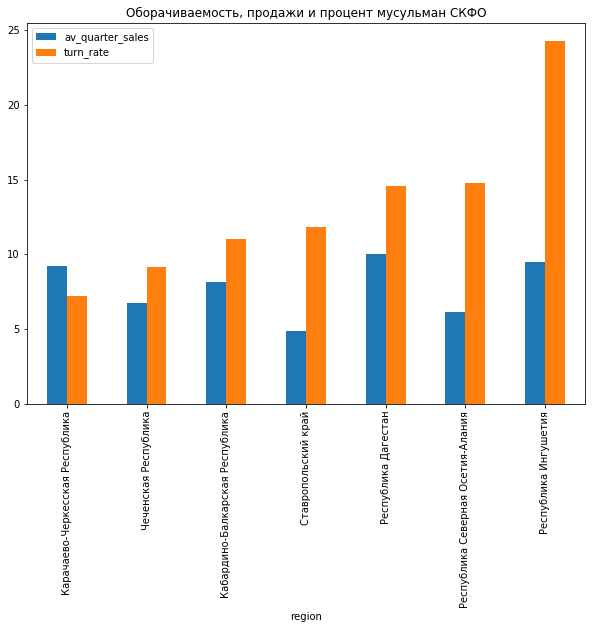

In [337]:
turn_sales = regions[['region', 'av_quarter_sales','turn_rate']][regions['district'] =='СКФО'].set_index('region')
turn_sales.sort_values(by='turn_rate').plot(kind='bar', figsize=(10,7), title='Оборачиваемость, продажи и процент мусульман СКФО')

In [366]:
# получаем полигоны регионов для отображения на карте
regions['polygons'] = regions.region.apply(lambda x: geolocator_N.geocode(x, geometry='wkt').raw['geotext'])

In [368]:
regions.to_pickle('C:/нетология/regions.pkl')

In [373]:
import shapely.wkt
regions['polygons'] = regions['polygons'].apply(lambda x: shapely.wkt.loads(x))

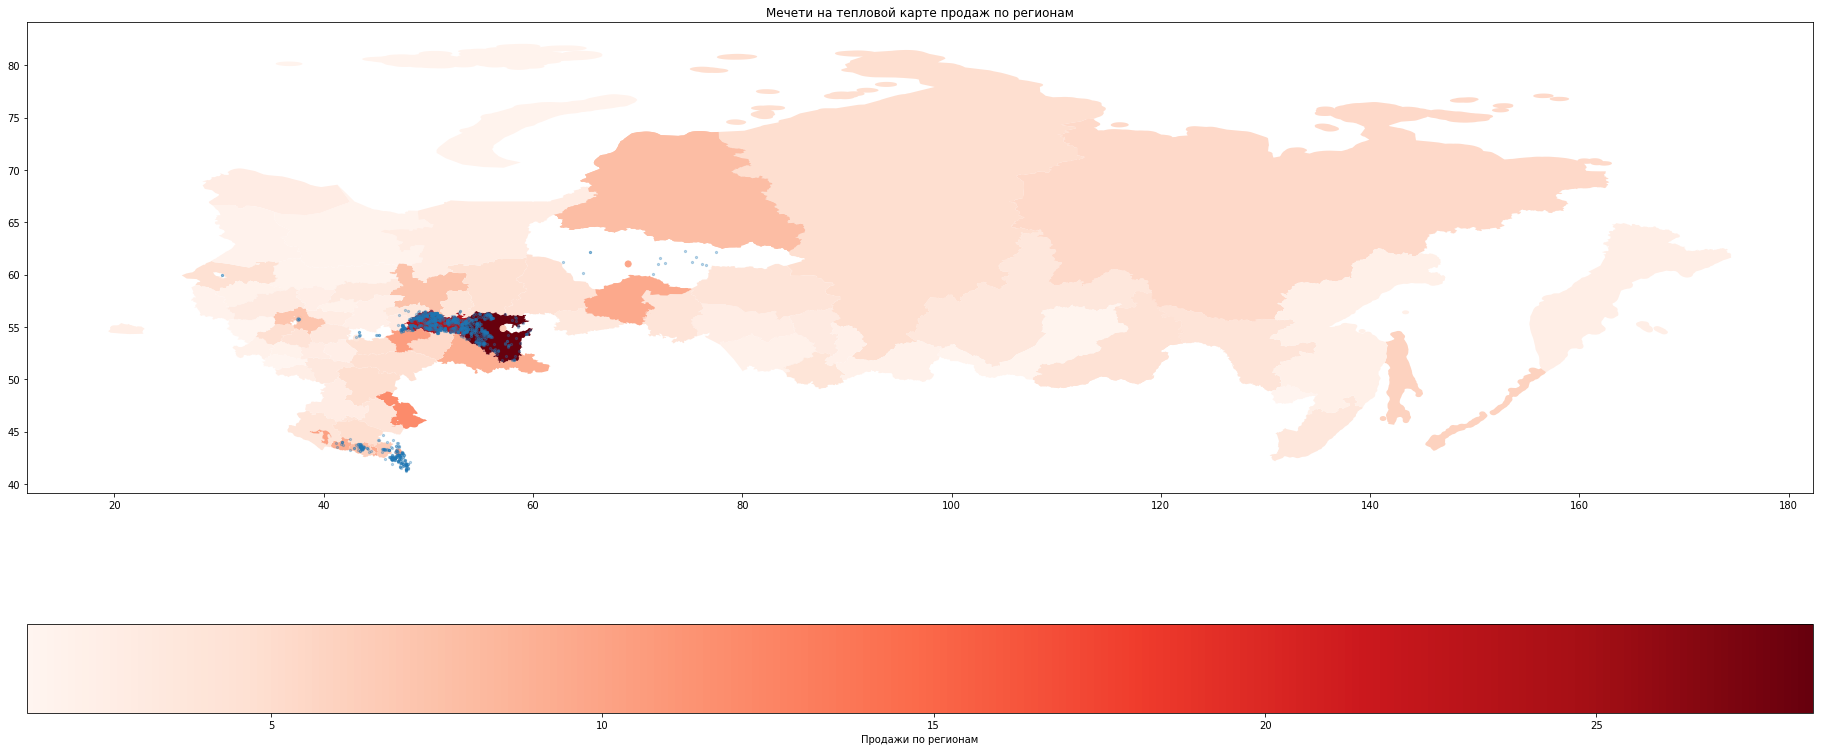

In [443]:
import geopandas as gpd

gpd_regions = gpd.GeoDataFrame(regions[['polygons', 'av_quarter_sales']],geometry='polygons')
ax = gpd_regions.plot(column='av_quarter_sales', 
                      cmap='Reds', 
                      figsize=(32, 16), 
                      legend=True,
                      legend_kwds={'label': "Продажи по регионам",'orientation': "horizontal"}
                     )

plt.scatter((*zip(*mosque_df.coords.apply(rev_coord))),s=5,  alpha=0.3)
plt.title('Мечети на тепловой карте продаж по регионам')
plt.show()

In [448]:
# На карте белая зона, посмотрим и исправим
regions[regions['region'].str.contains('Ханты')]

,region,months,sales,av_monthly_bal,shop_size,salary_reg,muslim_per_reg,religion_imp_reg,rus_per_reg,av_quarter_sales,amount,turn_rate,district,polygons
73,Ханты-Мансийский автономный округ,416,1378.0,12.96,6283.322485,72223.24,10.125,19.125,65.25,9.9375,36,3.912453,УФО,POINT (69.0982628 61.0259025)


In [450]:
geolocator_N.geocode('Ханты-Мансийский').address

'Ханты, улица Мира, городской округ Ханты-Мансийск, Ханты-Мансийский автономный округ — Югра, Уральский федеральный округ, 628000, Россия'

In [457]:
# поправляем полигон для Ханты-Мансийска
location = geolocator_N.geocode('Ханты-Мансийский автономный округ — Югра', geometry='wkt')
hanty = location.raw['geotext']

regions['polygons'][73] = shapely.wkt.loads(hanty)

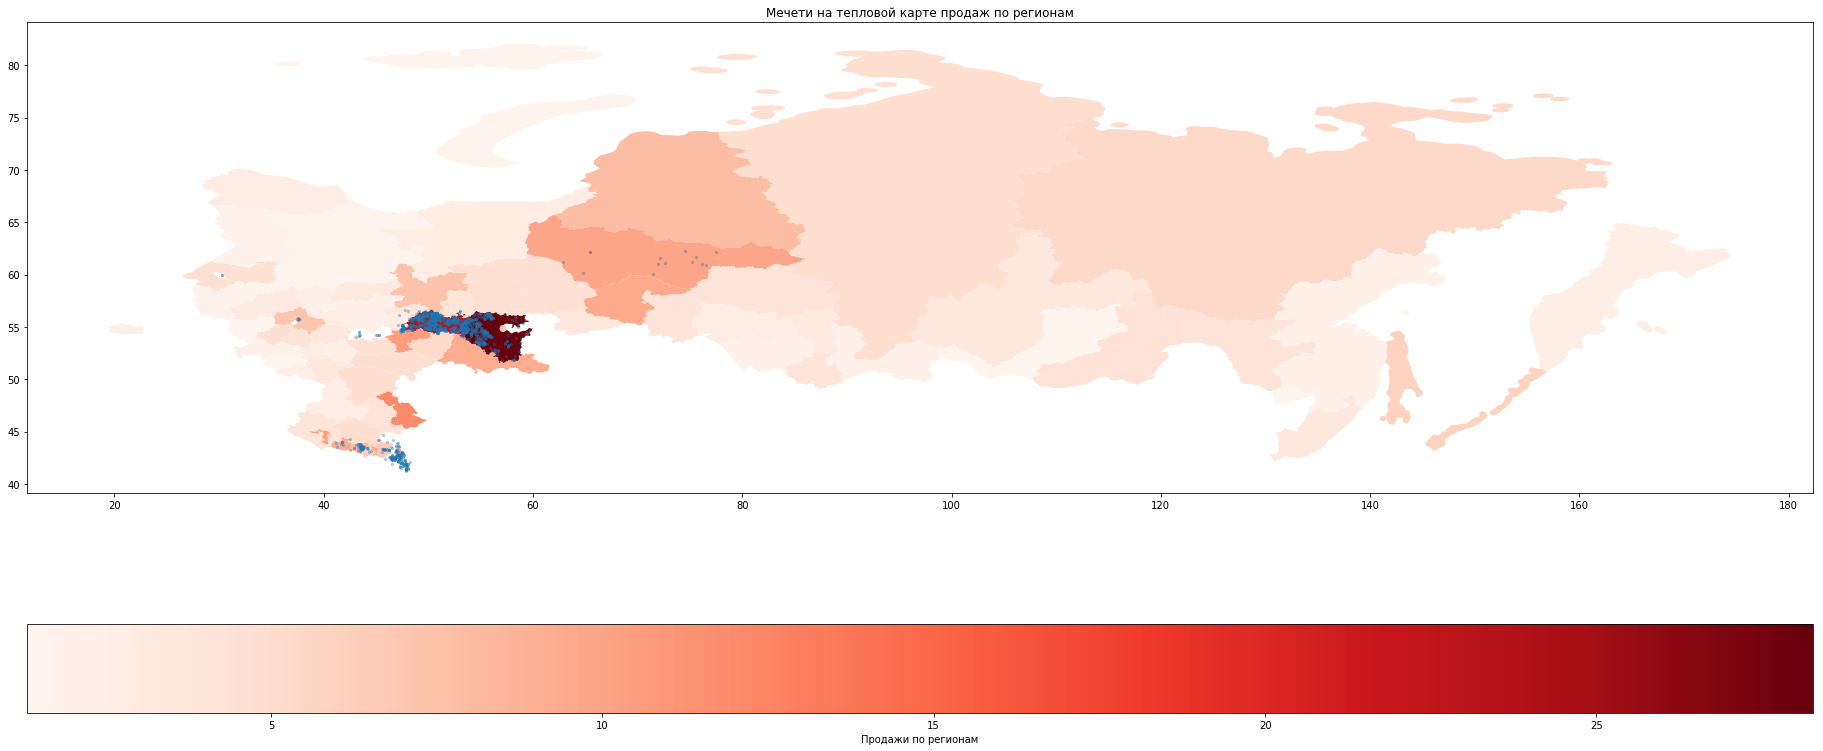

In [462]:
gpd_regions = gpd.GeoDataFrame(regions[['polygons', 'av_quarter_sales']],geometry='polygons')
ax = gpd_regions.plot(column='av_quarter_sales', 
                      cmap='Reds', 
                      figsize=(32, 16), 
                      legend=True,
                      legend_kwds={'label': "Продажи по регионам",'orientation': "horizontal"}
                     )

plt.scatter((*zip(*mosque_df.coords.apply(rev_coord))),s=5,  alpha=0.3)
plt.title('Мечети на тепловой карте продаж по регионам')
plt.show()

#### Выводы в разрезе регионов
+ В ПФО как и предполагалось лидируют несколько областей с высоким процентом мусульманского населения, в остальных областях региона продажи плохие.
+ СКФО магазины открытые в любой точке округа обеспечат стабильные продажи мусульманских подвесов.
+ Башкортостан и Татарстан являются однозначными лидерами среди областей - магазин, открытый в этом регионе однозначно обеспечит хорошие продажи мусульманских подвесов.
+ УФО более сбалансированные по продажам, чем ПФО - лидируют все области, но признак округа все равно нельзя использовать в качестве критерия для прогноза продаж мусульманских подвесов. 
+ Мечети влияют на продажи мусульманских подвесов, однако есть регионы без мечетей но с хорошими продажами мусульманских подвесов

In [274]:
# города
cities = mus_df[city_cols].groupby(mus_df['city']).sum().reset_index()
cities['av_quarter_sales'] = cities.sales / cities.months * 3
cities['amount'] = cities.city.apply(lambda x: mus_df.city.value_counts().to_dict()[x])
cities['turn_rate'] = (cities.av_monthly_bal / cities.amount) / (cities.sales / cities.months)

cities['shop_size'] = cities.shop_size / cities.amount
cities['population'] = cities.population / cities.amount

cities = cities.merge(mus_df[['region', 'district', 'city']].drop_duplicates(), on='city')

cities['coordinates'] = cities.city.apply(lambda x: geolocator_Y.geocode(x).point[:2])

In [279]:
cities

,city,months,sales,av_monthly_bal,shop_size,population,av_quarter_sales,amount,turn_rate,region,district,coordinates
0,Абакан,36,31.0,49.42,7249.944208,184168.0,2.583333,3,19.130323,Республика Хакасия,СФО,"(53.721152, 91.442387)"
1,Абинск,24,25.0,24.75,5059.060607,38176.0,3.125000,2,11.880000,Краснодарский край,ЮФО,"(44.866256, 38.151163)"
2,Азнакаево,12,111.0,24.83,5102.148614,34896.0,27.750000,1,2.684324,Республика Татарстан,ПФО,"(54.859808, 53.074533)"
3,Азов,24,30.0,36.67,7456.500000,80721.0,3.750000,2,14.668000,Ростовская область,ЮФО,"(47.112442, 39.423581)"
4,Алексин,12,11.0,18.42,7066.335496,57892.0,2.750000,1,20.094545,Тульская область,ЦФО,"(54.502429, 37.066034)"
...,...,...,...,...,...,...,...,...,...,...,...,...
379,Юрга,12,30.0,15.17,5488.834706,81759.0,7.500000,1,6.068000,Кемеровская область,СФО,"(55.713557, 84.933869)"
380,Яблоновский,6,8.0,80.17,8000.000000,1053.0,4.000000,1,60.127500,Республика Адыгея,ЮФО,"(44.989228, 38.942435)"
381,Якутск,12,14.0,8.25,6010.913597,311760.0,3.500000,1,7.071429,Республика Саха (Якутия),ДФО,"(62.027216, 129.732178)"
382,Ялуторовск,12,31.0,10.08,4176.616077,39967.0,7.750000,1,3.901935,Тюменская область,УФО,"(56.654689, 66.312206)"


In [280]:
cities.to_pickle(r'C:\нетология\cities.pkl')

In [302]:
def rev_coord(tuple_of_coordinates):
    """превращает гео координаты в математические"""
    return tuple(list(tuple_of_coordinates)[ : : -1])

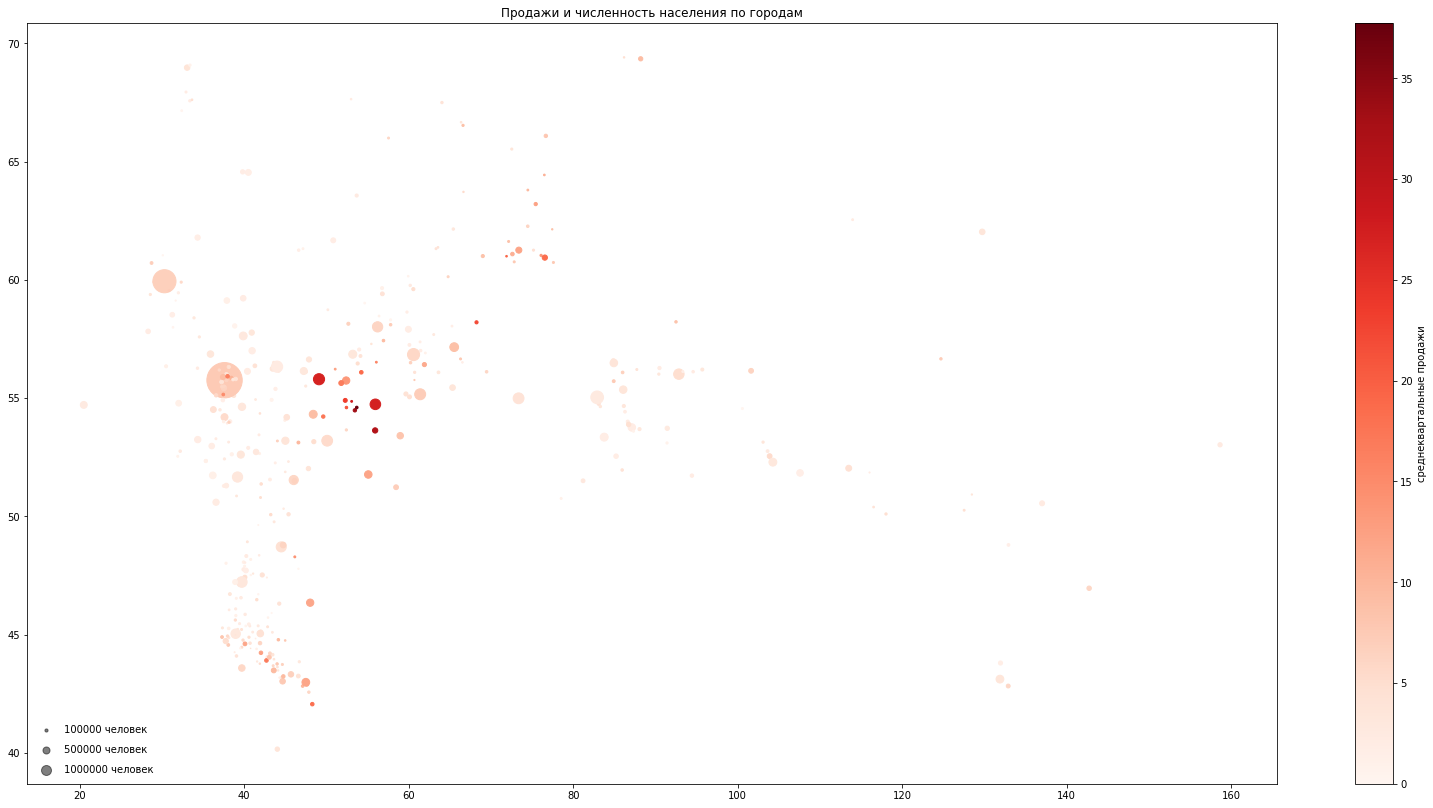

In [362]:
plt.figure(figsize=(28, 14))
population = (cities.population / 10000).to_list()
coordinates = cities['coordinates'].apply(rev_coord)
plt.scatter(*zip(*coordinates), s=population,
           c=cities.av_quarter_sales, cmap='Reds')

plt.title('Продажи и численность населения по городам')

plt.colorbar(label='среднеквартальные продажи')

for a in [10, 50, 100]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + '0000 человек')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left')

In [345]:
cities[['city', 'av_quarter_sales', 'turn_rate','amount', 'region', 'district']][cities['turn_rate'] < 8].sort_values('av_quarter_sales', ascending=False)[:30]

,city,av_quarter_sales,turn_rate,amount,region,district
336,Туймазы,37.750000,2.787815,1,Республика Башкортостан,ПФО
244,Октябрьский,33.250000,2.293534,1,Республика Башкортостан,ПФО
316,Стерлитамак,31.333333,2.864362,3,Республика Башкортостан,ПФО
2,Азнакаево,27.750000,2.684324,1,Республика Татарстан,ПФО
350,Уфа,27.234940,3.927308,15,Республика Башкортостан,ПФО
114,Казань,26.944954,4.661392,10,Республика Татарстан,ПФО
5,Альметьевск,23.500000,2.835319,2,Республика Татарстан,ПФО
331,Тобольск,22.000000,2.255455,2,Тюменская область,УФО
172,Лениногорск,21.250000,4.423059,1,Республика Татарстан,ПФО
261,Пойковский,19.250000,3.324156,1,Ханты-Мансийский автономный округ,УФО


#### Выводы в разрезе городов
+ Продажи мусульманских подвесов не связаны с размером города, тем не менее два крупных центра - Москва и Санкт-Петербург обладают стабильными средними продажами по мусульманским подвесам.
+ Подтверждается утверждение о том, что республики Башкортостан и Татарстан являются территориальными признаками для прогноза продаж по мусульманским подвесам - все города из этих районов в топе продаж

###### Рассмотрим данные из среза магазинов топ 100 по продажам

In [352]:
# доля топ 100 по окугам
mus_df['av_quarter_sales'] = mus_df.sales / mus_df.months * 3
top_sales = mus_df.sort_values(by='av_quarter_sales', ascending=False).iloc[:101]
top_distr = pd.DataFrame(top_sales.district.value_counts()).merge(pd.DataFrame(mus_df.district.value_counts()), left_index=True, right_index=True)
top_distr.columns = ['in_top_100', 'total_number']
top_distr['percent'] = (top_distr.in_top_100 / top_distr.total_number * 100).round(0)


,in_top_100,total_number,percent
ПФО,44,137,32.0
УФО,26,134,19.0
ЦФО,9,154,6.0
СКФО,8,62,13.0
СЗФО,7,126,6.0
ЮФО,4,179,2.0
СФО,2,154,1.0
ДФО,1,30,3.0


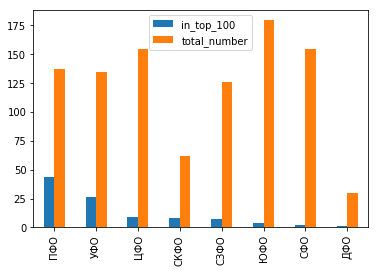

In [356]:
top_distr[['in_top_100', 'total_number']].plot(kind='bar')

In [360]:
# доля топ 100 по регионам
top_reg = pd.DataFrame(top_sales.region.value_counts()).merge(pd.DataFrame(mus_df.region.value_counts()), left_index=True, right_index=True)
top_reg.columns = ['in_top_100', 'total_number']
top_reg['percent'] = (top_reg.in_top_100 / top_reg.total_number * 100).round(0)
top_reg.sort_values('percent', ascending=False)

,in_top_100,total_number,percent
Республика Татарстан,17,18,94.0
Республика Башкортостан,19,21,90.0
Ульяновская область,4,6,67.0
Кировская область,1,2,50.0
Тюменская область,7,19,37.0
Ямало-Ненецкий автономный округ,4,11,36.0
Республика Адыгея,1,3,33.0
Республика Дагестан,3,9,33.0
Ханты-Мансийский автономный округ,11,36,31.0
Астраханская область,3,10,30.0


In [364]:
# доля топ 100 по городам
top_city = pd.DataFrame(top_sales.city.value_counts()).merge(pd.DataFrame(mus_df.city.value_counts()), left_index=True, right_index=True)
top_city.columns = ['in_top_100', 'total_number']
top_city['percent'] = (top_city.in_top_100 / top_city.total_number * 100).round(0)
top_city.sort_values('in_top_100', ascending=False)

,in_top_100,total_number,percent
Уфа,13,15,87.0
Казань,9,10,90.0
Санкт-Петербург,7,50,14.0
Сургут,5,9,56.0
Тюмень,5,14,36.0
Стерлитамак,3,3,100.0
Москва,3,20,15.0
Ульяновск,3,5,60.0
Нижнекамск,2,2,100.0
Ноябрьск,2,2,100.0


##### Выводы по ТОП 100:
Анализ выборки топ 100 объектов по продажам подтверждает предыдущие выводы по регионам, округам и городам. В процентном соотношении лидируют ПФО и УФО, по округам, Башкортостан и Татарстан по регионам и Казань с Уфой по городам. Также среди городов в тройку по проценту магазинов из топ 100 входит Санкт- Петербург, при этом в городе открыто самое большое количество магазинов сравнимое с количеством в регионах.